# Making of the GD Loss plots

In [ ]:
def gd(loss_array,val_loss_array, epoch, learning_rate):
    # Traning one epoch
    def train(a,b):
        loss=0
        sum1=0
        sum2=0

        ## Calculating the Training loss
        for i in range (0,(int) (0.9*len(df))):
            x=df.loc[i,"X"]
            y=df.loc[i,"y"]
            loss+=(((a*x)+b)-y)**2
            sum1=sum1+((((a*x)+b)-y)*x)
            sum2=sum2+(((a*x)+b)-y)

        # Updating the Parameters
        a=a-((learning_rate)*(sum1/(0.9*len(df))))
        b=b-((learning_rate)*(sum2/(0.9*len(df))))

        # Calculating the Validation loss
        val_loss=0
        for i in range((int) (0.9*(len(df))), len(df)):
            x = df.loc[i, "X"]
            y = df.loc[i, "y"]
            val_loss += (((a * x) + b) - y) ** 2

        ## Appending the losses in the array
        val_loss_array.append(val_loss/(2*0.1*len(df)))
        loss_array.append(loss/(2*0.9*len(df)))

        return a,b,(loss/(2*0.9*len(df)))

    prevloss=0
    a=0
    b=0
    for i in range (epoch):
        (a,b,loss)=train(a,b)

        ## Checking the convergence criteria
        if(prevloss!=0 and abs(loss-prevloss)<epsilon):
            epoch=i
            break
        prevloss=loss

    ## Printing the final parameters
    print("The final Paramters are ",a,b)
    print("Final Epoch Taken", epoch)
    return loss_array, val_loss_array

The final Paramters are  236.29858192093025 137.0132880073891
Final Epoch Taken 100
The final Paramters are  186.29645158387456 148.09537001739002
Final Epoch Taken 100
The final Paramters are  39.993215975459044 33.08235095072421
Final Epoch Taken 100


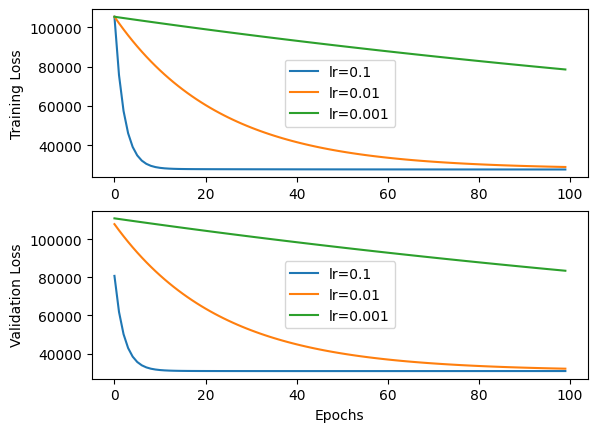

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
datapath = "data.csv"
epsilon=0.00001

## Importing the file
df_temp=pd.read_csv(datapath)

## Removing the Outliers by Z-Score
mean=df_temp['X'].mean()
std=df_temp['X'].std()
df=pd.DataFrame(columns=['X','y'])
for i in range (len(df_temp)):
    if((abs((df_temp.loc[i,'X']-mean)/std))<3):
        df.loc[len(df)]=df_temp.iloc[i]


def make_gd():
    fig,(ax1,ax2)=plt.subplots(2)

    ## Iterating over all the learning rates to run the gd and get the graph
    for i in range (1,4):
        lossarray=[]
        val_loss_array=[]
        lossarray,val_loss_array=gd(lossarray,val_loss_array,100,10**(-i))
        ax1.plot([i for i in range (len(lossarray))],lossarray, label=f"lr={10**(-i)}")
        ax2.plot([i for i in range(len(val_loss_array))], val_loss_array, label=f"lr={10 ** (-i)}")
    ax1.set_ylabel("Training Loss")
    ax1.legend()
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Validation Loss")
    ax2.legend()
    plt.show()

## Running the function
make_gd()

 # Making of the SGD Loss Plots

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Access the values

epsilon=0.00001
datapath="data.csv"

## Importing the data
df_temp=pd.read_csv(datapath)
k=5

## Removing the Outliers by Z-Scoreq
mean=df_temp['X'].mean()
std=df_temp['X'].std()
df=pd.DataFrame(columns=['X','y'])
mean2=df_temp['y'].mean()
std2=df_temp['y'].std()
for i in range (len(df_temp)):
    if((abs((df_temp.loc[i,'X']-mean)/std))<3  and (abs((df_temp.loc[i,'y']-mean2)/std2)<3)):
        df.loc[len(df)]=df_temp.iloc[i]
print("Final Length",len(df))


def sgd(train_df,epoch, learning_rate, validate_df, batch_size):
    training_loss_array=[]
    validation_loss_array=[]

    ## Training one epoch
    def train(a,b,train_df, validate_df):
        total_loss=0

        ## Shuffling the instances
        arr = np.random.permutation(len(train_df))
        train_df = train_df.iloc[arr].reset_index(drop=True)

        ## Iterating over the batches
        for i in range (0,(int) (len(train_df)/batch_size)):
            sum1=0
            sum2=0
            loss=0

            ## Iterating inside the batch to find the trainning loss
            for j in range (i*batch_size, (i+1)*batch_size):
                x=train_df.loc[j,'X']
                y=train_df.loc[j,'y']
                loss=loss+((((a*x)+b)-y)**2)
                sum1=sum1+((((a*x)+b)-y)*x)
                sum2=sum2+((a*x)+b-y)

            ## Updating the paramters by every batch
            a=a-((learning_rate)*(sum1)/batch_size)
            b=b-((learning_rate)*(sum2)/batch_size)
            total_loss=total_loss+(loss)

        ## Calculating the validation loss
        validation_total_loss=0
        for i in range (len(validate_df)):
            x = validate_df.loc[i, 'X']
            y = validate_df.loc[i, 'y']
            validation_total_loss+=((((a*x)+b)-y)**2)
        return a,b,(total_loss/(2*len(train_df))), (validation_total_loss/(2*len(validate_df)))

    a=0
    b=0
    first_error = 0
    first_val_error = 0

    ## Calculating the initial error
    for i in range(len(train_df)):
        x = train_df.loc[i, 'X']
        y = train_df.loc[i, 'y']
        first_error = first_error + ((((a * x) + b) - y) ** 2)

    for i in range(len(validate_df)):
        x = validate_df.loc[i, 'X']
        y = validate_df.loc[i, 'y']
        first_val_error+=((((a * x) + b) - y) ** 2)

    ## Appending the initial error
    training_loss_array.append(first_error/(len(train_df)*2))
    validation_loss_array.append(first_val_error/(len(validate_df)*2))

    ## Running the Algorithm
    for _ in range (epoch):
        (a,b,loss, validation_loss)=train(a,b,train_df,validate_df)
        training_loss_array.append(loss)
        validation_loss_array.append(validation_loss)

        ## Convergence criteria
        if(len(training_loss_array)>k):
            total_loss=0
            for i in range(1,k+1):
                total_loss+=abs(training_loss_array[-i]-training_loss_array[-(i+1)])
            if(((total_loss)/k)<epsilon):
                break

    ## Printing the final Parameter
    print("Number of the Epochs used:", len(training_loss_array)-1)
    print("Parameters a and b", a, b)
    return (training_loss_array, validation_loss_array)

Final Length 7941


Number of the Epochs used: 100
Parameters a and b 215.6801551559206 73.964410959834
Number of the Epochs used: 100
Parameters a and b 233.7884928729083 123.50271960528755
Number of the Epochs used: 100
Parameters a and b 242.01288483337794 125.02958756341013


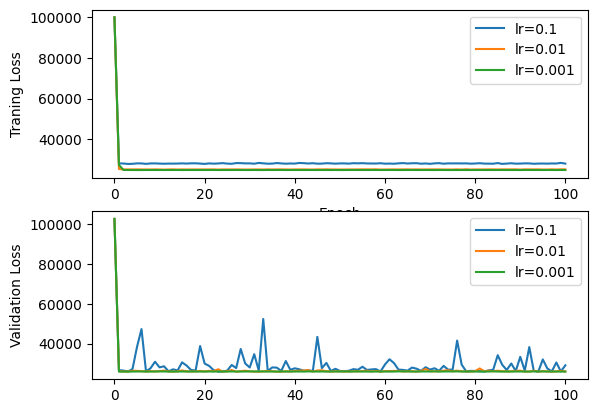

In [ ]:
def make_sgd(batch_size):

    ## Splitting the dataset
    fig, (ax1,ax2)=plt.subplots(2)
    train_df=df[0:(int) (0.9*len(df))]
    validate_df=df[(int)(0.9*len(df)): len(df)]
    validate_df=validate_df.reset_index(drop=True)

    ## Iterating over all the learning rates to make the graphs
    for i in range (1,4):
        training_loss_array, validation_loss_array=sgd(train_df, 100,10**(-i), validate_df, batch_size)
        ax1.plot([i for i  in range (len(training_loss_array))], training_loss_array, label=f"lr={10**(-i)}")
        ax2.plot([i for i in range (len(validation_loss_array))], validation_loss_array, label=f"lr={10**(-i)}")
        ax2.plot()
    ax1.set_ylabel("Traning Loss")
    ax2.set_ylabel("Validation Loss")
    ax1.set_xlabel("Epoch")
    ax1.legend()
    ax2.legend()
    plt.show()

make_sgd(1)

# Analyzing the Z-Score

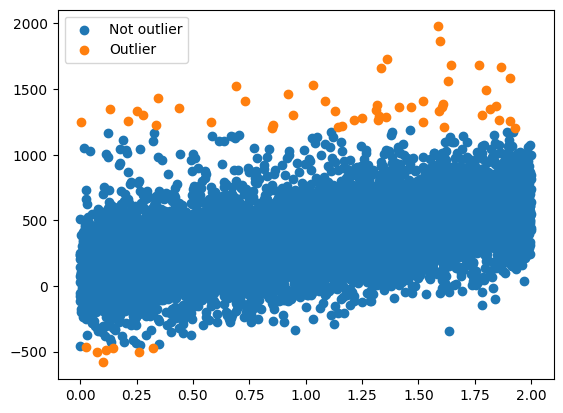

In [ ]:
## Taking out the mean and standard deviation
df_temp=pd.read_csv("data.csv")
mean=df_temp['X'].mean()
std=df_temp['X'].std()
df=pd.DataFrame(columns=['X','y'])
mean2=df_temp['y'].mean()
std2=df_temp['y'].std()
df_outlier=pd.DataFrame(columns=['X','y'])

## Finding the outliers
for i in range (len(df_temp)):
    if((abs((df_temp.loc[i,'X']-mean)/std))<3  and (abs((df_temp.loc[i,'y']-mean2)/std2)<3)):
        df.loc[len(df)]=df_temp.iloc[i]
    else:
      df_outlier.loc[len(df)]=df_temp.iloc[i]

## Plotting them to analyze
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(df['X'], df['y'],label="Not outlier")
ax.scatter(df_outlier['X'], df_outlier['y'], label="Outlier")
ax.legend()
plt.show()

# Analyzing the Quantile

1.4829611028


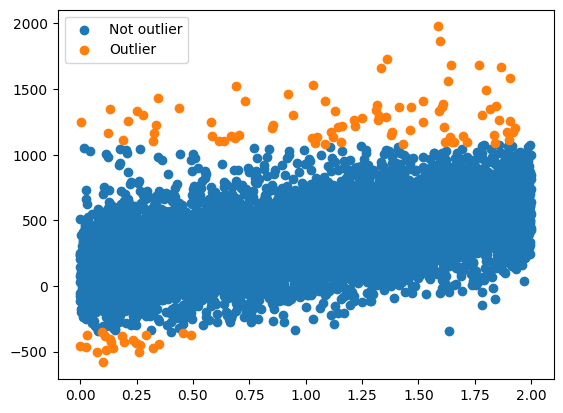

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Finding the quantiles of the X
k=1.5
df=pd.read_csv("data.csv")
q1=df['X'].quantile(0.25)
q3=df['X'].quantile(0.75)
offset = k*(q3-q1)
print(offset)

## Finding the quantiles of the Y
q11=df['y'].quantile(0.25)
q33=df['y'].quantile(0.75)
offset1=k*(q33-q11)
tempdf=pd.DataFrame(columns=['X','y'])
outlier_df=pd.DataFrame(columns=['X','y'])

## Finding the outliters
for i in range (8000):
  if(df.loc[i,'X']<(q3+offset) and df.loc[i,'X']>(q1-offset) and df.loc[i,'y']<(q33+offset1) and df.loc[i,'y']>(q11-offset1)):
    tempdf.loc[len(tempdf)]=df.iloc[i]
  else:
    outlier_df.loc[len(outlier_df)]=df.iloc[i]

## Plotting the graphs to visualize
fig,ax=plt.subplots()
ax.scatter(tempdf['X'], tempdf['y'],label="Not outlier")
ax.scatter(outlier_df['X'], outlier_df['y'], label="Outlier")
ax.legend()
plt.show()

# Finding the Regression Coffecient

In [5]:
import pandas as pd
df=pd.read_csv("data.csv")

## Parameters
SST=0
SSR=0
a= 238.10180371981144
b= 128.63585999483203
y_mean=df['y'].mean()

## Calculating the SST and SSR
for i in range (len(df)):
    SST+=(df.loc[i,'y']-y_mean)**2
    SSR+=((a*df.loc[i,'X'])+b-y_mean)**2
print("The coffecient of regression =", (SSR/SST))


The coffecient of regression = 0.2483341831106733


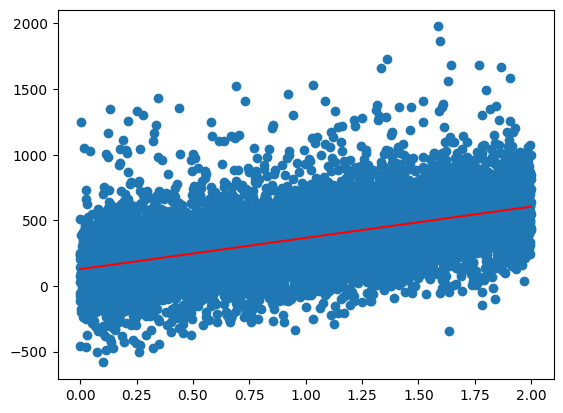

In [10]:
## Checking the Regression Line
a= 238.10180371981144
b= 128.63585999483203
import matplotlib.pyplot as plt
import pandas
import numpy as np
df=pd.read_csv("data.csv")
fig,ax=plt.subplots()
ax.scatter(df['X'], df['y'])
min=np.array(df['X']).min()
max=np.array(df['X']).max()
array=np.linspace(min,max,100)
y=a*array+b
ax.plot(array,y,color='red')
plt.show()